# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [ ]:
#https://stackoverflow.com/questions/48908772/read-csv-with-pandas-from-subdirectory-on-windows-and-unix
from pathlib import Path
root = Path()
root

In [ ]:
project_data = pd.read_csv(root / 'train_data.csv')
resource_data = pd.read_csv(root / 'resources.csv')

In [ ]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

In [ ]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

In [ ]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]

#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)

# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]

project_data.head(2)

In [ ]:
#https://stackoverflow.com/questions/36997619/sklearn-stratified-sampling-based-on-a-column
project_data.head()
project_data= project_data.iloc[:9999,]
is_approved=project_data.pop('project_is_approved')
print(project_data.shape)

## 1.2 preprocessing of `project_subject_categories`

In [ ]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 preprocessing of `project_subject_subcategories`

In [ ]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

# 1.4 Preprocessing of Project_Grade_Category

In [ ]:
grade_catogories = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

grade_cat_list = []
for i in grade_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    #for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
     #   if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
      #      j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
    i = i.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
    i = i.replace('-','_')
    #print(i + " " + temp)
    temp +=i.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
       # temp = temp.replace('&','_')
    #print(temp.strip())
    grade_cat_list.append(temp.strip())
    #print(grade_cat_list)

project_data['clean_grades'] = grade_cat_list
project_data.drop(['project_grade_category'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_grades'].values:
    my_counter.update(word.split())
    
grade_cat_dict = dict(my_counter)
sorted_grade_cat_dict = dict(sorted(grade_cat_dict.items(), key=lambda kv: kv[1]))

## 1.4 Text preprocessing of Essay

In [ ]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [ ]:
project_data.head(2)

In [ ]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
sent = decontracted(project_data['essay'].values[2000])
print(sent)
print("="*50)

In [ ]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

In [ ]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

In [ ]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

In [19]:
# after preprocesing
preprocessed_essays[2000]

<h2><font color='red'> 1.6 Preprocessing of `project_title`</font></h2>

In [20]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    #sent = sent.replace('\\r', ' ')
    #sent = sent.replace('\\"', ' ')
    #sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title.append(sent.lower().strip())

# Vectorization of Categogiral Values

In [21]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot_train = vectorizer.transform(project_data['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot_train.shape)

In [22]:
#Text for capturing feature names after vectorization
feature_names=[]
feature_names.extend(vectorizer.get_feature_names())
print(len(feature_names))

# Vectorization of Sub-Category 

In [23]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot_train = vectorizer.transform(project_data['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_train.shape)

In [24]:
feature_names.extend(vectorizer.get_feature_names())
print(len(feature_names))

# Vectorization of Teacher

In [25]:
# feature encoding with teacher_prefix 
teach_prfx = project_data.teacher_prefix.value_counts()
unq_prfx = teach_prfx.index.to_list()
#https://stackoverflow.com/questions/47301795/removing-special-characters-from-a-list-of-items-in-python
unq_prfx = [''.join(e for e in string if e.isalnum()) for string in unq_prfx]
unq_prfx.sort()
#unq_prfx

# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=unq_prfx, lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values.astype('U'))
print(vectorizer.get_feature_names())


teacher_prefix_one_hot_train = vectorizer.transform(project_data['teacher_prefix'].values.astype('U'))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_train.shape)

In [26]:
feature_names.extend(vectorizer.get_feature_names())
print(len(feature_names))

# Vectorization of project_grade_category

In [27]:
# feature encoding with  project_grade_category
grade_ct_count = project_data.clean_grades.value_counts()
pj_grd_cat = grade_ct_count.index.to_list()
pj_grd_cat.sort()
pj_grd_cat

# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=pj_grd_cat, lowercase=False, binary=True)
vectorizer.fit(project_data['clean_grades'].values.astype('U'))
print(vectorizer.get_feature_names())


project_grade_category_one_hot_train = vectorizer.transform(project_data['clean_grades'].values.astype('U'))
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_train.shape)

In [28]:
feature_names.extend(vectorizer.get_feature_names())
print(len(feature_names))

# Vectorization of state

In [29]:
# feature encoding with state

state_count = project_data.school_state.value_counts()
unq_state = state_count.index.to_list()
unq_state.sort()

# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=unq_state, lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())


state_one_hot_train = vectorizer.transform(project_data['school_state'].values)
print("Shape of matrix after one hot encodig ",state_one_hot_train.shape)

In [30]:
feature_names.extend(vectorizer.get_feature_names())
print(len(feature_names))

# TF IDF encoding for Essay

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(min_df=10,max_features = 5000)
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf_train = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf_train.shape)

In [32]:
feature_names.extend(vectorizer.get_feature_names())
print(len(feature_names))

# TF IDF for Title

In [33]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(min_df=10,max_features = 500)
vectorizer = TfidfVectorizer(min_df=10)
title_tfidf_train = vectorizer.fit_transform(preprocessed_title)
print("Shape of matrix after one hot encodig ",title_tfidf_train.shape)

In [34]:
feature_names.extend(vectorizer.get_feature_names())
print(len(feature_names))

# Vectorizing Price

In [35]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [36]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean :" + str(price_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(price_scalar.var_[0])))

# Now standardize the data with above maen and variance.
price_standardized_train = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

In [37]:
feature_names.extend(['price'])

# Vectorizing Quantity 

In [38]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

quantity_scalar = StandardScaler()
quantity_scalar.fit(project_data['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean :" + str(quantity_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(quantity_scalar.var_[0])))

# Now standardize the data with above maen and variance.
quantity_standardized_train = quantity_scalar.transform(project_data['quantity'].values.reshape(-1, 1))

In [39]:
feature_names.extend(['quantity'])

# Vectorizing teacher_number_of_previously_posted_projects

In [40]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

teacher_number_scalar = StandardScaler()
teacher_number_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 
# finding the mean and standard deviation of this data
print("Mean :" + str(teacher_number_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(teacher_number_scalar.var_[0])))

# Now standardize the data with above maen and variance.
teacher_number_standardized_train = teacher_number_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

In [41]:
feature_names.extend(['teacher_number_of_previously_posted_projects'])

#  Merging all data sets

In [42]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_tfidf = hstack((categories_one_hot_train, sub_categories_one_hot_train, 
                      teacher_prefix_one_hot_train, project_grade_category_one_hot_train,state_one_hot_train
           ,text_tfidf_train,title_tfidf_train,price_standardized_train,quantity_standardized_train
           ,teacher_number_standardized_train))
x_tfidf.shape
#title_tfidf_train

# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

<h1>2. Clustering </h1>

<h2>2.4 Dimensionality Reduction on the selected features </h2>

In [43]:
from sklearn.decomposition import TruncatedSVD
svd= TruncatedSVD(algorithm='randomized',n_components=5000, n_iter=3, random_state=42)

#from sklearn.feature_selection import SelectKBest, chi2
#k_best = SelectKBest(chi2, k=5000)

x_final = svd.fit_transform(x_tfidf)

In [44]:
x_final.shape

(9999, 5000)

In [45]:
#https://stackoverflow.com/questions/44633571/how-can-i-get-the-feature-names-from-sklearn-truncatedsvd-object/49055864
best_features = [feature_names[i] for i in svd.components_[0].argsort()[::-1]]

In [46]:
best_features=best_features[:5000]

In [47]:
len(best_features)

5000

<h2>2.5 Apply Kmeans</h2>

In [48]:
from sklearn.cluster import KMeans
inertia={}
from tqdm import tqdm

for i in tqdm(range(1,5,1)):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit_transform(x_final)
    inertia[i]=kmeans.inertia_ 

100%|██████████| 4/4 [02:27<00:00, 33.86s/it]


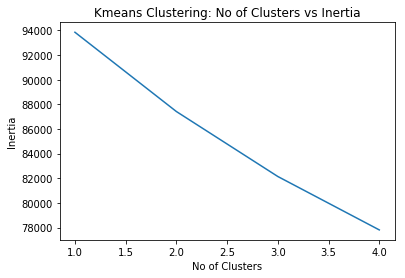

In [49]:
#https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values/37266356
import matplotlib.pyplot as plt

lists = sorted(inertia.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.title("Kmeans Clustering: No of Clusters vs Inertia")
plt.xlabel("No of Clusters")
plt.ylabel("Inertia")
plt.show()

### Conclusion:
 - Number of clusters is increasing with the decrease in the value of inertia

In [50]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit_transform(x_final)

array([[3.56745169, 4.02839718, 5.26873874, 3.77038133, 3.26133188],
       [2.82733172, 5.58805986, 4.58595814, 4.34336057, 2.47770736],
       [2.06197039, 5.16922863, 4.61055388, 3.98101855, 2.55919069],
       ...,
       [2.72354198, 5.55969968, 4.78317381, 4.41741896, 2.4546028 ],
       [2.14942466, 5.65823681, 4.07704839, 4.3799039 , 2.76978242],
       [2.20850168, 5.21161856, 4.52541838, 4.63018969, 2.67237717]])

In [51]:
len(kmeans.labels_)

9999

In [52]:
essay = project_data['essay']
essay

0       I have been fortunate enough to use the Fairy ...
1       Imagine being 8-9 years old. You're in your th...
2       Having a class of 24 students comes with diver...
3       I recently read an article about giving studen...
4       My students crave challenge, they eat obstacle...
                              ...                        
9994    Students at our school are future innovators t...
9995    My students are special because they are so di...
9996    Our school serves students in grades P-5 and p...
9997    I am very fortunate to teach in a wonderful sc...
9998    This school year I will be teaching kindergart...
Name: essay, Length: 9999, dtype: object

In [53]:
#https://andrew47.github.io/scikitlearn-cluster.html
centroids = pd.DataFrame(kmeans.labels_)

In [54]:
#column=['index','zero','First','Second','Third','Fourth']
#centroids.columns=column
centroids.head(5)

,0
0,4
1,4
2,0
3,4
4,0


In [55]:
#cent = dict(zip(centroids['index'], centroids['zero']))
#cent
centroids.head(5)
final_essay=pd.concat([essay,centroids],axis=1)
final_essay.head()

,essay,0
0,I have been fortunate enough to use the Fairy ...,4
1,Imagine being 8-9 years old. You're in your th...,4
2,Having a class of 24 students comes with diver...,0
3,I recently read an article about giving studen...,4
4,"My students crave challenge, they eat obstacle...",0


In [56]:
#https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe
#pd.options.display.max_colwidth=500
pd.set_option('display.max_colwidth', -1)

In [57]:
final_essay[final_essay[0]==0]['essay'].head(5)

2     Having a class of 24 students comes with diverse learners.  Some students learn best through auditory means.I have a class of twenty-four kindergarten students.\r\nMy students attend a Title 1 school and a great majority are English language learners. Most of our students come from low-income homes, and all students receive free breakfast and lunch. My students are enthusiastic learners, but too often are faced with many types of hardships at home. School is often a safe haven for them.By having a mobile listening and storage center, my students will be able to reinforce and enhance what they are learning.  They will be able to listen to stories using the mobile listening center to help reinforce the high frequency words that have been introduced.  In addition, they will be able to listen to stories that reinforce reading comprehension skills and strategies amongst other auditory experiences.A mobile listening center will help keep equipment neat and organized....ready to use to 

In [58]:
final_essay[final_essay[0]==1]['essay'].head(5)

8      Never has society so rapidly changed. Technology invades every corner of our lives. How can we pretend to educate the citizens of tomorrow without the proper equipment?Our Language Arts and Social Justice Magnet School emphasizes the respect of self and others.  This encompasses discipline and high expectations as well as activism and compassion. The kids know they will be Agents of Change and follow our school motto \"Be the change you want to see in the world.\" Unfortunately, more than 75% of our students come from economically disadvantaged families and parents can't step in to help financially.\"Is it my turn, Ms. K? When am I going to be able to go to our site, Ms. K?\" My second grade students sometimes wait two or three days before being able to create documents, practice their skills with the games I designed, or complete a research project. They need new technology!   An iPad mini will enable students to access our class qr codes and website where I posted my video-les

In [59]:
final_essay[final_essay[0]==2]['essay'].head(5)

22     Education is about nurturing justice, engaging students in thinking critically about our democracy, entrusting them with our future. That is why everything we do in our classroom centers around developing the habits of mind to create critical thinkers, articulate speakers, and confident individuals.Students from all over the city attend seeking a stronger, deeper, more open education that can ensure them of achieving those next steps in life.\r\n\r\nThese students have goals to surpass expectations placed upon them by society and are the voices that have been historically excluded from conversations. When we think about creating an all-encompassing dialogue from a diversity of points of view, no conversation would be complete without them.I plan on using both of these texts to help students develop voice and critical reflection on the world around them. For Monster, I will be conducting a unit on racial profiling, stereotyping, and the criminal justice system. For Bless Me Ultim

In [60]:
final_essay[final_essay[0]==3]['essay'].head(5)

6      \"Sitting still is overrated. It makes sense for the opera or for meditating, but in most classrooms and child care centers, it's given far more honor than it deserves. Children need to move.\" Tom Hunter,National Association for the Education of Young Children. Our class is flexible and collaborativeWe are a room full of bright, curious, innovative, and wiggly third graders.  Our brains work best when we are comfortable and have space to move around and collaborate with our peers.  Our teacher provides us a child centered environment where we can use our critical thinking skills through research and inquiry.  While education is evolving with new, rigorous standards, and we are incorporating technology to experience the world, our teacher needs help to keep our brains moving...by keeping US MOVING!  Thank you for helping us grow and learn.We will use this new and modern furniture to help the kids to work ergonomically.   We all need to be able to work comfortably and be able to 

In [61]:
final_essay[final_essay[0]==4]['essay'].head(5)

0    I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motio

There are 7432490 words in the combination of all review.


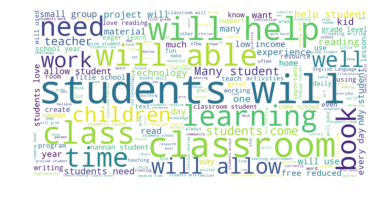

There are 429386 words in the combination of all review.


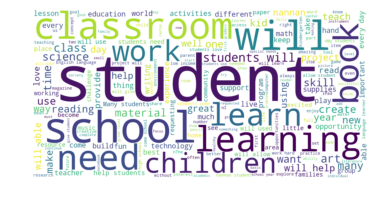

There are 673930 words in the combination of all review.


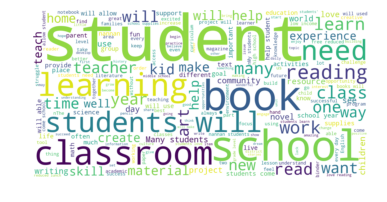

There are 767248 words in the combination of all review.


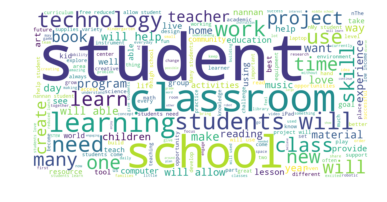

There are 6496321 words in the combination of all review.


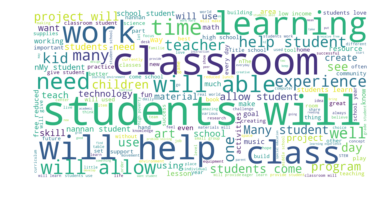

In [64]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline
#https://www.datacamp.com/community/tutorials/wordcloud-python

for i in range(5):
    text = " ".join(essay for essay in final_essay[final_essay[0]==i]['essay'])
    print("There are {} words in the combination of all review.".format(len(text)))

    # Create stopword list:
    stopwords = set(STOPWORDS)

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white",height=800,width=1600).generate(text)

    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

<h2>2.6 Apply AgglomerativeClustering</h2>

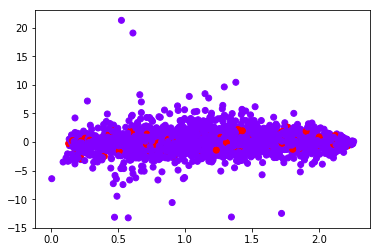

In [65]:
#https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(x_final)
plt.scatter(x_final[:,0], x_final[:,1], c=cluster.labels_, cmap='rainbow')

In [66]:
centroids = pd.DataFrame(cluster.labels_)
centroids.head(5)

,0
0,1
1,0
2,0
3,0
4,0


In [67]:
final_essay=pd.concat([essay,centroids],axis=1)
final_essay.head()

,essay,0
0,"I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed. I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status. Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects. I would use the kits and robot to help guide my science instruction in engaging and meaningful ways. I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed. The following units will be taught in the next school year where I will implement these kits: magnets, motion, sink vs. float, robots. I often get to these units and don't know If I am teaching the right way or using the right materials. The kits will give me additional ideas, strategies, and lessons to prepare my students in science.It is challenging to develop high quality science activities. These kits give me the materials I need to provide my students with science activities that will go along with the curriculum in my classroom. Although I have some things (like magnets) in my classroom, I don't know how to use them effectively. The kits will provide me with the right amount of materials and show me how to use them in an appropriate way.",1
1,"Imagine being 8-9 years old. You're in your third grade classroom. You see bright lights, the kid next to you is chewing gum, the birds are making noise, the street outside is buzzing with cars, it's hot, and your teacher is asking you to focus on learning. Ack! You need a break! So do my students.Most of my students have autism, anxiety, another disability, or all of the above. It is tough to focus in school due to sensory overload or emotions. My students have a lot to deal with in school, but I think that makes them the most incredible kids on the planet. They are kind, caring, and sympathetic. They know what it's like to be overwhelmed, so they understand when someone else is struggling. They are open-minded and compassionate. They are the kids who will someday change the world.It is tough to do more than one thing at a time. When sensory overload gets in the way, it is the hardest thing in the world to focus on learning. My students need many breaks throughout the day, and one of the best items we've used is a Boogie Board. If we had a few in our own classroom, my students could take a break exactly when they need one, regardless of which other rooms in the school are occupied. Many of my students need to do something with their hands in order to focus on the task at hand. Putty will give the sensory input they need in order to focus, it will calm them when they are overloaded, it will help improve motor skills, and it will make school more fun.When my students are able to calm themselves down, they are ready to learn. When they are able to focus, they will learn more and retain more. They will get the sensory input they need and it will prevent meltdowns (which are scary for everyone in the room). This will lead to a better, happier classroom community that is able to learn the most they can in the best way possible.",0
2,"Having a class of 24 students comes with diverse learners. Some students learn best through auditory means.I have a class of twenty-four kindergarten students.\r\nMy students attend a Title 1 school and a great majority are English language learners. Most of our students come from low-income homes, and all students receive free breakfast and lunch. My students are enthusiastic learners, but too often are faced with many types of hardships at home. School is often a safe haven for 

In [68]:
final_essay[final_essay[0]==0]['essay'].head(5)

1    Imagine being 8-9 years old. You're in your third grade classroom. You see bright lights, the kid next to you is chewing gum, the birds are making noise, the street outside is buzzing with cars, it's hot, and your teacher is asking you to focus on learning. Ack! You need a break! So do my students.Most of my students have autism, anxiety, another disability, or all of the above. It is tough to focus in school due to sensory overload or emotions. My students have a lot to deal with in school, but I think that makes them the most incredible kids on the planet. They are kind, caring, and sympathetic. They know what it's like to be overwhelmed, so they understand when someone else is struggling. They are open-minded and compassionate. They are the kids who will someday change the world.It is tough to do more than one thing at a time. When sensory overload gets in the way, it is the hardest thing in the world to focus on learning. My students need many breaks throughout the day, and on

In [69]:
final_essay[final_essay[0]==1]['essay'].head(5)

0     I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, moti

There are 14889925 words in the combination of all review.


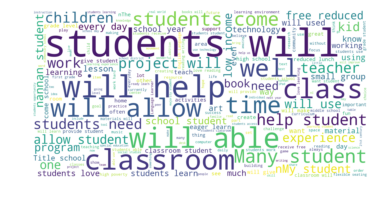

There are 909453 words in the combination of all review.


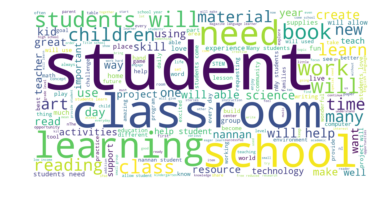

In [70]:
%matplotlib inline
#https://www.datacamp.com/community/tutorials/wordcloud-python

for i in range(2):
    text = " ".join(essay for essay in final_essay[final_essay[0]==i]['essay'])
    print("There are {} words in the combination of all review.".format(len(text)))

    # Create stopword list:
    stopwords = set(STOPWORDS)

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white",height=800,width=1600).generate(text)

    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

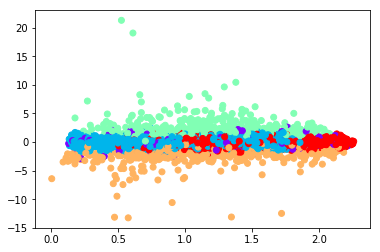

In [71]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(x_final)
plt.scatter(x_final[:,0],x_final[:,1], c=cluster.labels_, cmap='rainbow')

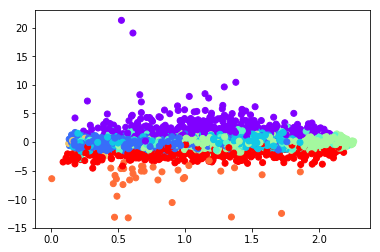

In [72]:
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
cluster.fit_predict(x_final)
plt.scatter(x_final[:,0],x_final[:,1], c=cluster.labels_, cmap='rainbow')

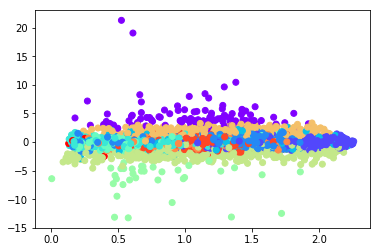

In [73]:
cluster = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
cluster.fit_predict(x_final)
plt.scatter(x_final[:,0],x_final[:,1], c=cluster.labels_, cmap='rainbow')

<h2>2.7 Apply DBSCAN</h2>

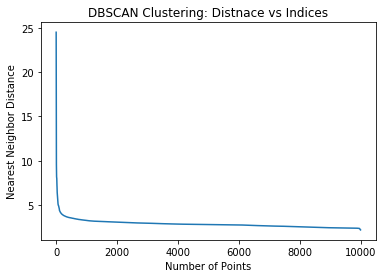

In [74]:
#https://stackoverflow.com/questions/48010276/how-to-estimate-eps-using-knn-distance-plot-in-dbscan
from sklearn.cluster import DBSCAN 
from sklearn.neighbors import NearestNeighbors

ns = 65
nbrs = NearestNeighbors(n_neighbors=ns).fit(x_final)
distances, indices = nbrs.kneighbors(x_final)
distanceDec = sorted(distances[:,ns-1], reverse=True)
plt.plot(list(range(1,10000)), distanceDec)
plt.title("DBSCAN Clustering: Distnace vs Indices")
plt.xlabel("Number of Points")
plt.ylabel("Nearest Neighbor Distance")
plt.show()

In [75]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
# Numpy array of all the cluster labels assigned to each data point 

for i in np.arange(2.3,2.8,0.1): 
    db_default = DBSCAN(eps=i, min_samples=25, n_jobs=-1).fit(x_final) 
    labels = db_default.labels_ 
# Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print("EPS: "+ str(i)+ " Clusters: " +  str(n_clusters_) + " Noise: "+ str(n_noise_))
    #print('Estimated number of noise points: %d' % n_noise_)
#print(labels)

EPS: 2.3 Clusters: 9 Noise: 7405
EPS: 2.4 Clusters: 10 Noise: 6026
EPS: 2.5 Clusters: 6 Noise: 3722
EPS: 2.6 Clusters: 2 Noise: 2648
EPS: 2.7 Clusters: 1 Noise: 1541


In [86]:
db_default = DBSCAN(eps=2.5, min_samples=25, n_jobs=-1).fit(x_final) 
labels = db_default.labels_ 

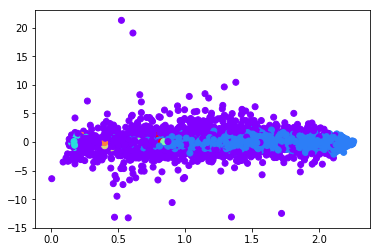

In [77]:
plt.scatter(x_final[:,0],x_final[:,1], c=labels, cmap='rainbow')

In [78]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
centroids = pd.DataFrame(db_default.labels_)
centroids.head(5)

,0
0,-1
1,0
2,0
3,0
4,0


In [79]:
final_essay=pd.concat([essay,centroids],axis=1)
final_essay.head()

,essay,0
0,"I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed. I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status. Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects. I would use the kits and robot to help guide my science instruction in engaging and meaningful ways. I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed. The following units will be taught in the next school year where I will implement these kits: magnets, motion, sink vs. float, robots. I often get to these units and don't know If I am teaching the right way or using the right materials. The kits will give me additional ideas, strategies, and lessons to prepare my students in science.It is challenging to develop high quality science activities. These kits give me the materials I need to provide my students with science activities that will go along with the curriculum in my classroom. Although I have some things (like magnets) in my classroom, I don't know how to use them effectively. The kits will provide me with the right amount of materials and show me how to use them in an appropriate way.",-1
1,"Imagine being 8-9 years old. You're in your third grade classroom. You see bright lights, the kid next to you is chewing gum, the birds are making noise, the street outside is buzzing with cars, it's hot, and your teacher is asking you to focus on learning. Ack! You need a break! So do my students.Most of my students have autism, anxiety, another disability, or all of the above. It is tough to focus in school due to sensory overload or emotions. My students have a lot to deal with in school, but I think that makes them the most incredible kids on the planet. They are kind, caring, and sympathetic. They know what it's like to be overwhelmed, so they understand when someone else is struggling. They are open-minded and compassionate. They are the kids who will someday change the world.It is tough to do more than one thing at a time. When sensory overload gets in the way, it is the hardest thing in the world to focus on learning. My students need many breaks throughout the day, and one of the best items we've used is a Boogie Board. If we had a few in our own classroom, my students could take a break exactly when they need one, regardless of which other rooms in the school are occupied. Many of my students need to do something with their hands in order to focus on the task at hand. Putty will give the sensory input they need in order to focus, it will calm them when they are overloaded, it will help improve motor skills, and it will make school more fun.When my students are able to calm themselves down, they are ready to learn. When they are able to focus, they will learn more and retain more. They will get the sensory input they need and it will prevent meltdowns (which are scary for everyone in the room). This will lead to a better, happier classroom community that is able to learn the most they can in the best way possible.",0
2,"Having a class of 24 students comes with diverse learners. Some students learn best through auditory means.I have a class of twenty-four kindergarten students.\r\nMy students attend a Title 1 school and a great majority are English language learners. Most of our students come from low-income homes, and all students receive free breakfast and lunch. My students are enthusiastic learners, but too often are faced with many types of hardships at home. School is often a safe haven for

In [80]:
final_essay[final_essay[0]==0]['essay'].head(5)

1    Imagine being 8-9 years old. You're in your third grade classroom. You see bright lights, the kid next to you is chewing gum, the birds are making noise, the street outside is buzzing with cars, it's hot, and your teacher is asking you to focus on learning. Ack! You need a break! So do my students.Most of my students have autism, anxiety, another disability, or all of the above. It is tough to focus in school due to sensory overload or emotions. My students have a lot to deal with in school, but I think that makes them the most incredible kids on the planet. They are kind, caring, and sympathetic. They know what it's like to be overwhelmed, so they understand when someone else is struggling. They are open-minded and compassionate. They are the kids who will someday change the world.It is tough to do more than one thing at a time. When sensory overload gets in the way, it is the hardest thing in the world to focus on learning. My students need many breaks throughout the day, and on

In [81]:
final_essay[final_essay[0]==1]['essay'].head(5)

32     Our athletes are a group of roughly 60 kids who work hard and attain some pretty impressive feats.  We are an Urban school with some pretty lacking facilities.  We train on a paved surfaced that wraps around a baseball field, softball field, tennis courts, and partially into a parking lot.Our team has been represented at our State meet each season (both indoor and outdoor track) for the past 9 years straight. We have also been represented at the New Balance National Outdoor meet each of those past same 9 years. We have to very creative in our approach because our facility is an asphalt surface that encompasses two fields, tennis courts and partially runs through our parking lot. At the state level we have produced many all-state performers with one state Champion a few years back. At the national level we have finished as high as 10th in the nation twice. It is our goal not only to train kids to be better athletes, but to be well rounded people. We volunteer often at events thro

In [84]:
final_essay[final_essay[0]==2]['essay'].head()

97     My classroom is never \"normal\" & I strive to keep my kiddos from fitting into a category. I want for my students to be themselves and that requires movement, communication and learning -all combined! I will be posting several projects to attempt to help them continue to grow.My students are amazing! They are unique! They deal with many things outside of the typical elementary classroom. My students are children of our nation's military! They serve along with their parents and have to endure many moves, parent deployment and long distance travels frequently.Things like pencil sharpeners and clipboards are an every day must in a 3rd grade classroom of this nature! Anything outside of that is to engage my students in their learning and provide them with an opportunity to have some choice and variety in their own learning.Any donations made toward our projects will help tremendously with the education of military children. They need movement and kinesthetic opportunities in order 

There are 9463570 words in the combination of all review.


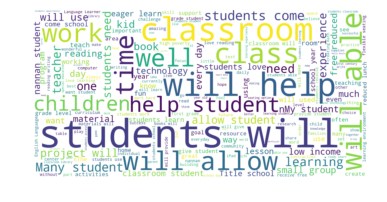

There are 77096 words in the combination of all review.


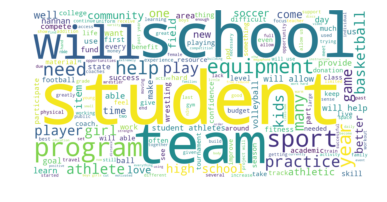

There are 105753 words in the combination of all review.


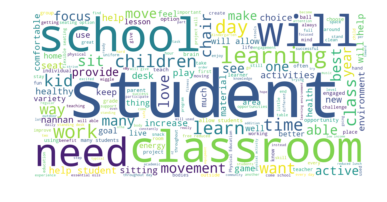

There are 39783 words in the combination of all review.


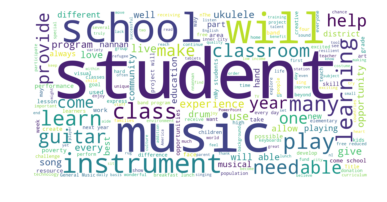

There are 28770 words in the combination of all review.


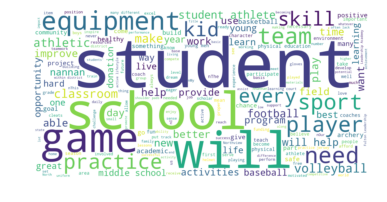

There are 60635 words in the combination of all review.


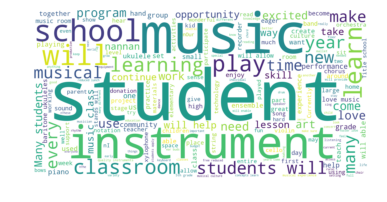

In [85]:
%matplotlib inline
#https://www.datacamp.com/community/tutorials/wordcloud-python

for i in range(n_clusters):
    text = " ".join(essay for essay in final_essay[final_essay[0]==i]['essay'])
    print("There are {} words in the combination of all review.".format(len(text)))
    # Create stopword list:
    stopwords = set(STOPWORDS)
    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white",height=800,width=1600).generate(text)

    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

<h1>3. Conclusions</h1>
<br> Please write down few lines of your observations on this assignment.

 - Some of the most commom words common across clusters are students, will, class, learning, classroom
 - Few words namely students, school, classroom,will are deciding 
 - As number of clusters is increased, clusters are being identified around sports, music needs too 